## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

ModuleNotFoundError: No module named 'sklearn'

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r'C:\Users\alexi\OneDrive - Alzo Solutions (1)\Documents\ML Projects\src\notebook\data\Churn_Modelling.csv')

#### Show Top 5 Records

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Outlier treatment

C:\Users\alexi\AppData\Local\Temp\ipykernel_13268\4114319264.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\alexi\AppData\Local\Temp\ipykernel_13268\4114319264.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\alexi\AppData\Local\Temp\ipykernel_13268\4114319264.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


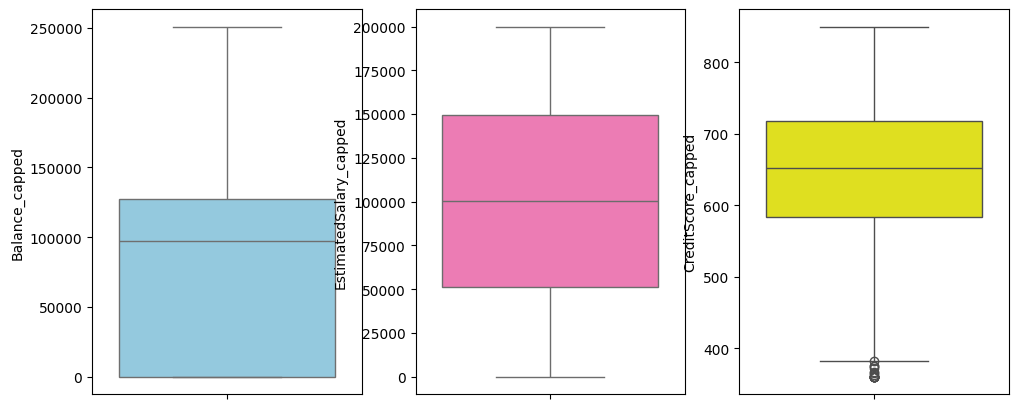

In [4]:
# Treat outliers by capping them at 3 standard deviations
stdv_limit = 3
df['Balance_capped'] = np.clip(df['Balance'], df['Balance'].mean() - stdv_limit * df['Balance'].std(), df['Balance'].mean() + stdv_limit * df['Balance'].std())
df['EstimatedSalary_capped'] = np.clip(df['EstimatedSalary'], df['EstimatedSalary'].mean() - stdv_limit * df['EstimatedSalary'].std(), df['EstimatedSalary'].mean() + stdv_limit * df['EstimatedSalary'].std())
df['CreditScore_capped'] = np.clip(df['CreditScore'], df['CreditScore'].mean() - stdv_limit * df['CreditScore'].std(), df['CreditScore'].mean() + stdv_limit * df['CreditScore'].std())

# Plot boxplots for the capped columns
plt.subplots(1,3,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Balance_capped'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['EstimatedSalary_capped'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['CreditScore_capped'],color='yellow')
plt.show()

In [6]:
# Create a new DataFrame without z-score columns and original non-capped columns
df = df.drop([ 'Balance', 'EstimatedSalary', 'CreditScore'], axis=1)


KeyError: "['Balance', 'EstimatedSalary', 'CreditScore'] not found in axis"

In [7]:
df.head()

,RowNumber,CustomerId,Surname,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Balance_capped,EstimatedSalary_capped,CreditScore_capped
0,1,15634602,Hargrave,France,Female,42,2,1,1,1,1,0.00,101348.88,619.0
1,2,15647311,Hill,Spain,Female,41,1,1,0,1,0,83807.86,112542.58,608.0
2,3,15619304,Onio,France,Female,42,8,3,1,0,1,159660.80,113931.57,502.0
3,4,15701354,Boni,France,Female,39,1,2,0,0,0,0.00,93826.63,699.0
4,5,15737888,Mitchell,Spain,Female,43,2,1,1,1,0,125510.82,79084.10,850.0


In [8]:
df= df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [9]:
df.head()

,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Balance_capped,EstimatedSalary_capped,CreditScore_capped
0,France,Female,42,2,1,1,1,1,0.00,101348.88,619.0
1,Spain,Female,41,1,1,0,1,0,83807.86,112542.58,608.0
2,France,Female,42,8,3,1,0,1,159660.80,113931.57,502.0
3,France,Female,39,1,2,0,0,0,0.00,93826.63,699.0
4,Spain,Female,43,2,1,1,1,0,125510.82,79084.10,850.0


#### Preparing X and Y variables

In [10]:
X = df.drop(columns=['Exited'],axis=1)

In [11]:
X.head()

,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Balance_capped,EstimatedSalary_capped,CreditScore_capped
0,France,Female,42,2,1,1,1,0.00,101348.88,619.0
1,Spain,Female,41,1,1,0,1,83807.86,112542.58,608.0
2,France,Female,42,8,3,1,0,159660.80,113931.57,502.0
3,France,Female,39,1,2,0,0,0.00,93826.63,699.0
4,Spain,Female,43,2,1,1,1,125510.82,79084.10,850.0


In [12]:
y = df['Exited']

In [13]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [14]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

ModuleNotFoundError: No module named 'sklearn'

In [16]:
X = preprocessor.fit_transform(X)

In [18]:
X.shape

(1000, 19)

In [21]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [22]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

### Results

In [24]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.849847
5,Random Forest Regressor,0.847291
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.760313


## Linear Regression

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


## Plot y_pred and y_test

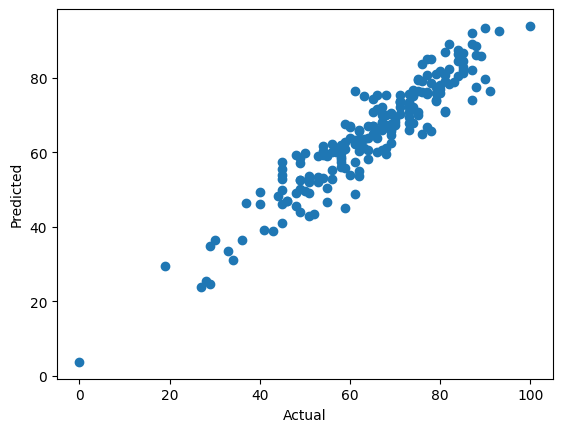

In [26]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

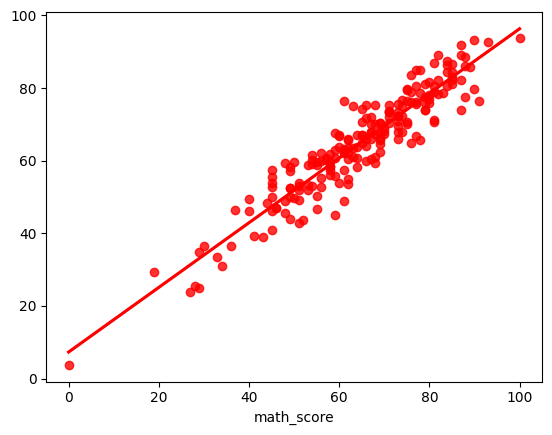

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
